Accuracy: 100.00%


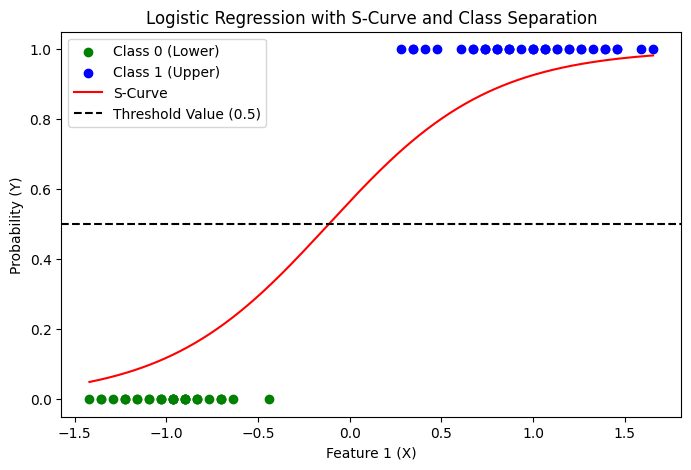

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset (using Iris dataset for simplicity)
iris = datasets.load_iris()

# We will use only two classes and two features to make it binary classification
# Class 0 will be below and Class 1 will be above in terms of values for better separation
X = iris.data[iris.target != 2, :2]  # Taking first two features and only two classes
y = iris.target[iris.target != 2]

# Ensure that one class is below and the other is above in the feature space
# e.g., Shift class 0 points to the lower side of the feature space
X[y == 0, :] -= 2  # Shift the first class down for visualization clarity

# Standardize the features to improve fitting of the logistic curve
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the output for the test set
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualization of Logistic Regression (S-Curve for one feature)

# Generate test data for the logistic function (S-curve)
X_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300)

# Use the mean of the second feature instead of setting it to zero
mean_feature_2 = np.mean(X_train[:, 1])

# Reshape for prediction, holding the second feature constant at its mean value
X_vals_reshaped = np.c_[X_vals, np.full_like(X_vals, mean_feature_2)]

# Plot the S-curve (Logistic function)
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0][y_train == 0], y_train[y_train == 0], color='green', label='Class 0 (Lower)')
plt.scatter(X_train[:, 0][y_train == 1], y_train[y_train == 1], color='blue', label='Class 1 (Upper)')
plt.plot(X_vals, model.predict_proba(X_vals_reshaped)[:, 1], color='red', label='S-Curve')

# Add title and labels
plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold Value (0.5)')
plt.xlabel('Feature 1 (X)')
plt.ylabel('Probability (Y)')
plt.title('Logistic Regression with S-Curve and Class Separation')
plt.legend()

# Display the plot
plt.show()
